In [71]:
# import librarties
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# rcparam
from matplotlib import rcParams

In [72]:
# set matploblib syling to seaborn
plt.style.use('seaborn') # deprecated

rcParams['axes.titlepad'] = 15
rcParams['axes.labelpad'] = 15
rcParams['axes.titlesize'] = 10
rcParams['axes.labelsize'] = 10
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8
rcParams['legend.fontsize'] = 8
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.labelweight'] = 'bold'

C:\Users\hiday\AppData\Local\Temp\ipykernel_8544\3174804320.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # deprecated


## Dataset


### Dataset Information

- Experimental data used for binary classification (room occupancy) from Temperature, Humidity, Light and CO2. 
- Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.

### Dataset Attribute

| Attribute | Description |
| --- | --- |
| date time | year-month-day hour:minute:second |
| Temperature | in Celsius |
| Relative Humidity | % |
| Light | in Lux |
| CO2 | in ppm |
| Humidity Ratio | Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air |
| Occupancy | 0 or 1, 0 for not occupied, 1 for occupied status |

### Dataset Source

[Accurate occupancy detection of an office room from light, temperature, humidity and CO2 measurements using statistical learning models. Luis M. Candanedo, VÃ©ronique Feldheim. Energy and Buildings. Volume 112, 15 January 2016, Pages 28-39.](https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#)

### Dataset Citation

Candanedo,Luis. (2016). Occupancy Detection . UCI Machine Learning Repository.

In [73]:
# set directories
dir = os.getcwd()
folder = 'data'
path = os.path.join(dir, folder)

# set training data
train = 'data-training.txt'

# open data
data = pd.read_csv(os.path.join(path, train))

# check data
data.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.180,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.150,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.150,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.150,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.100,27.2000,426.0,704.500000,0.004757,1
6,2015-02-04 17:55:59,23.100,27.2000,419.0,701.000000,0.004757,1
7,2015-02-04 17:57:00,23.100,27.2000,419.0,701.666667,0.004757,1
8,2015-02-04 17:57:59,23.100,27.2000,419.0,699.000000,0.004757,1
9,2015-02-04 17:58:59,23.100,27.2000,419.0,689.333333,0.004757,1
10,2015-02-04 18:00:00,23.075,27.1750,419.0,688.000000,0.004745,1


In [74]:
# check data infromation
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


Change date datatype to datetime

In [75]:
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [76]:
# check data statistic
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [77]:
# check if theres any null values
data.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [78]:
# check if theres any duplicated values
data.duplicated().sum()

0

### Univariate Analysis

in this section, we will analyze each attribute of the dataset individually.

#### Numerical Attributes

for numerical attributes, we can create kde plots to understand the distribution of the data.

Numerical Attributes:
- Temperature
- Relative Humidity
- Light
- CO2
- Humidity Ratio

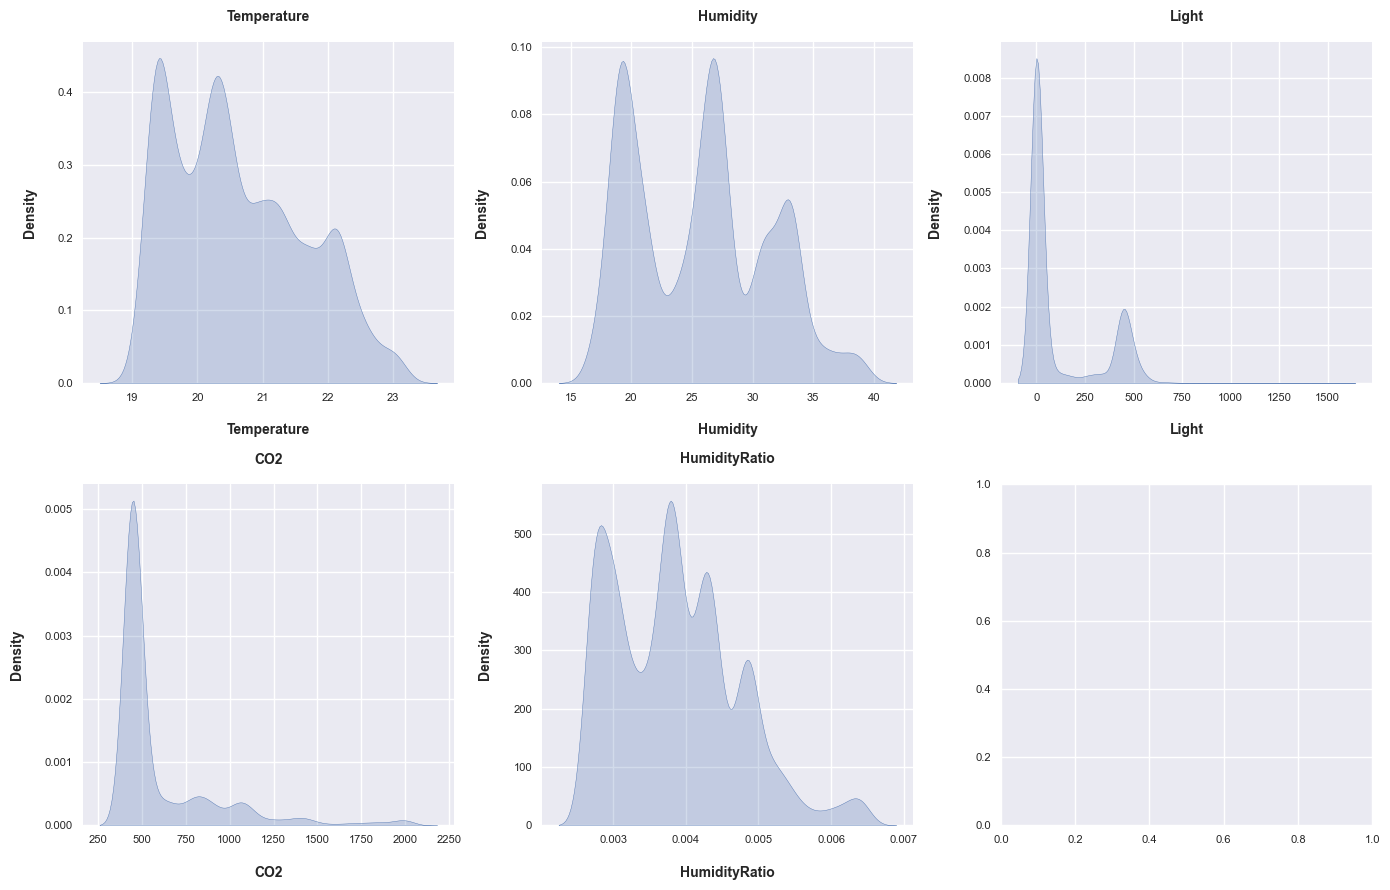

In [79]:
# set columns
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

# create plot
fig, axes = plt.subplots(2, 3, figsize=(14, 9))

# plot data
for i, ax in enumerate(axes.flat[:len(columns)]):
    sns.kdeplot(data[columns[i]], ax=ax, fill=True)
    ax.set_title(columns[i])

# display plot
plt.tight_layout()
plt.show()

#### Categorical Attributes

for categorical attributes, we can create count plots to understand the distribution of the data.

categorical attributes:
- Occupancy

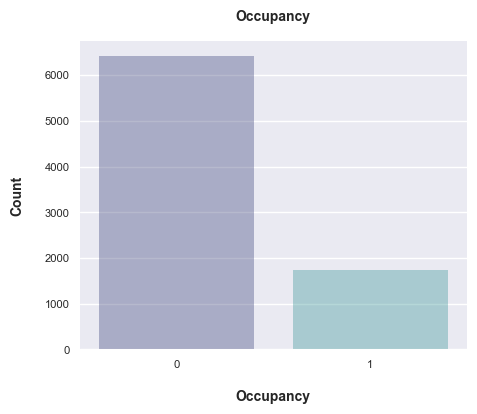

In [80]:
column = 'Occupancy'

# create plot
fig, ax = plt.subplots(figsize=(5, 4))

# plot data
sns.countplot(data=data, x=column, ax=ax, palette='mako', alpha=.4)
ax.set_xlabel(column)
ax.set_ylabel('Count')
ax.set_title('Occupancy')

# display plot
plt.show()

### Bivariate Analysis

in this section, we will analyze the relationship between each attribute of the dataset.

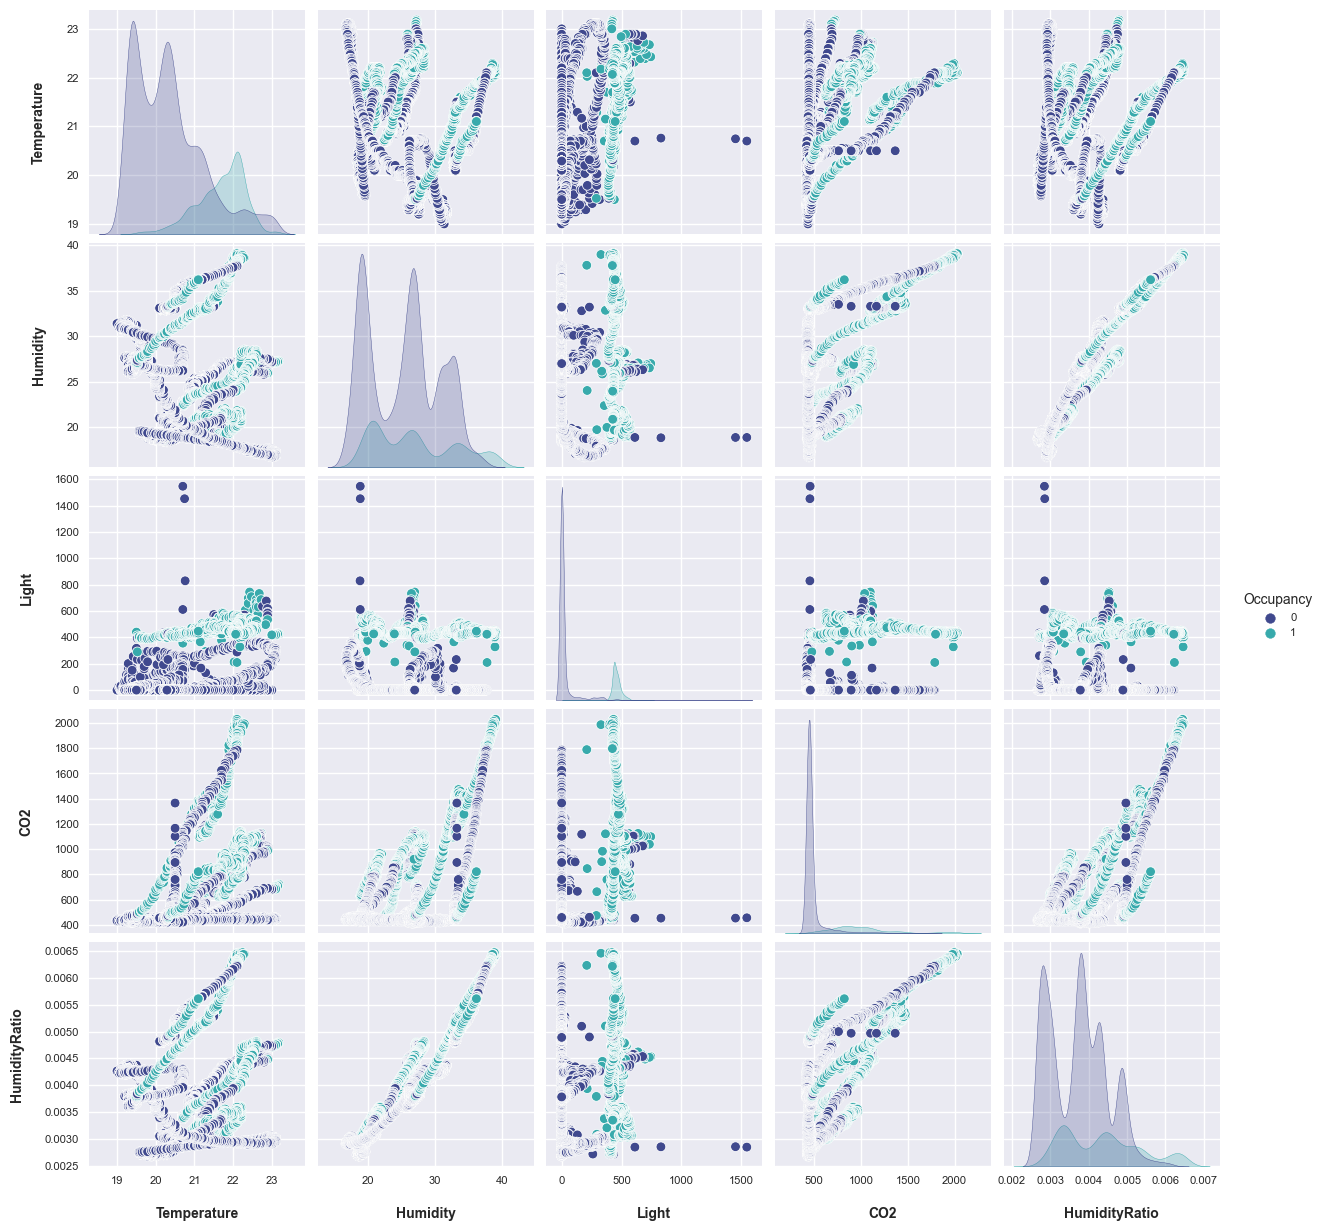

In [81]:
# plot data with pairplot
sns.pairplot(data=data, hue='Occupancy', palette='mako')

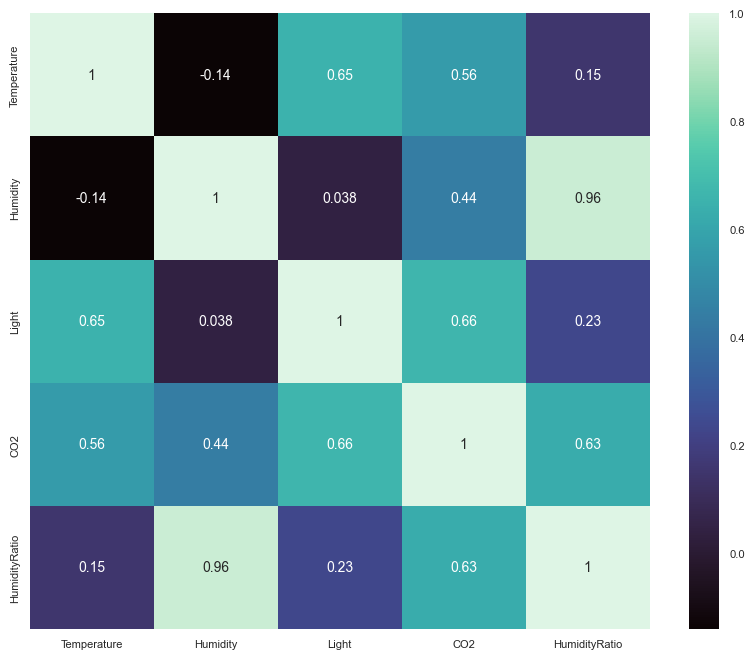

In [82]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data[columns].corr(), annot=True, cmap='mako', ax=ax)
plt.show()

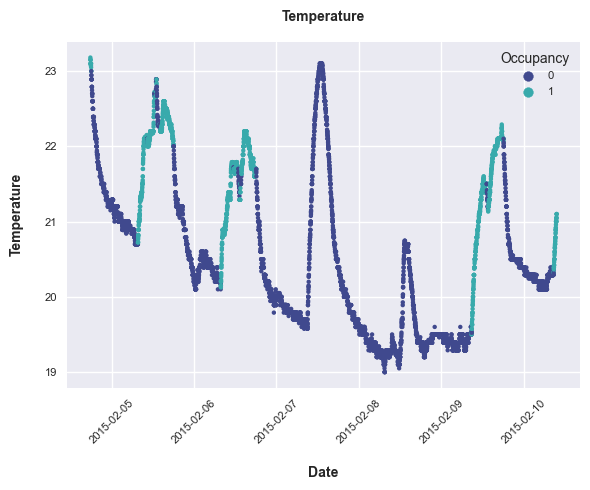

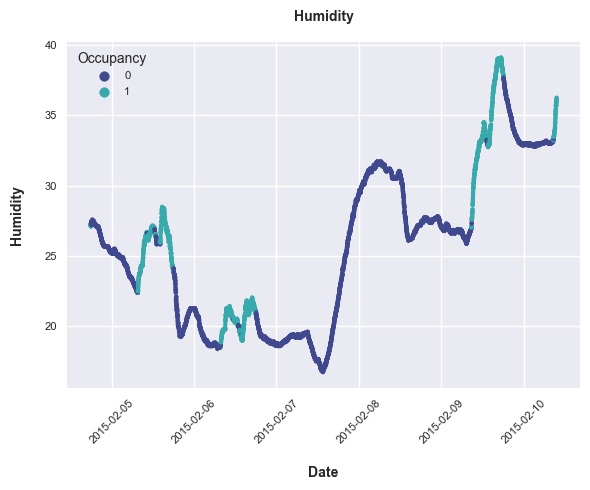

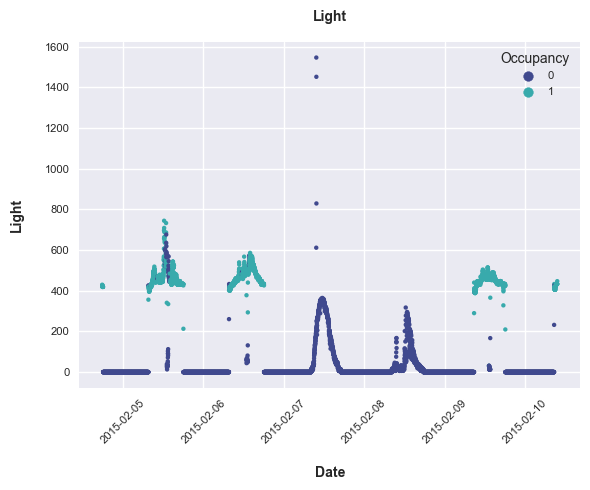

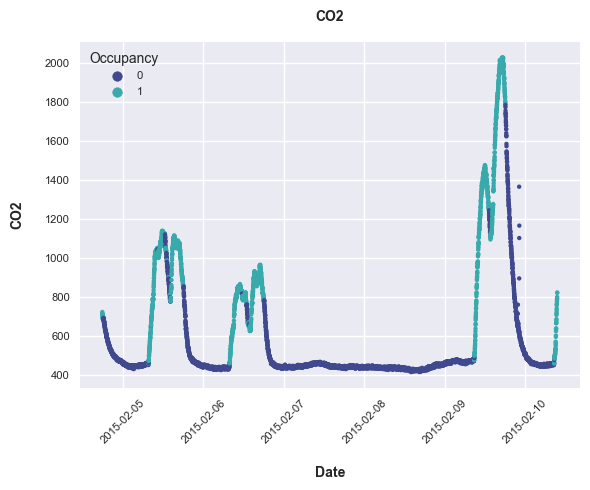

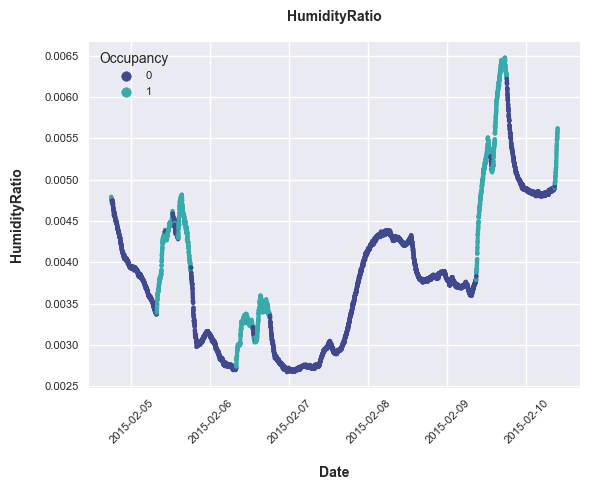

In [108]:
# sort data by date
data = data.sort_values(by='date')

# loop for each column
for item in columns:
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.scatterplot(data=data, x='date', y=item, ax=ax, hue='Occupancy', palette='mako', s=10, linewidth=0)
    ax.set_title(item)
    ax.set_xlabel('Date')
    ax.set_ylabel(item)
    
    # rotate xticks
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        
    # display plot
    plt.tight_layout()
    plt.show()

In [109]:
data[data['Occupancy'] == 1].describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.0
mean,21.673192,27.147938,459.854347,1037.704786,0.004355,1.0
std,0.622891,6.128497,42.286862,377.603278,0.001006,0.0
min,19.500000,18.600000,31.000000,439.000000,0.002715,1.0
25%,21.290000,21.236000,433.000000,796.000000,0.003419,1.0
50%,21.767500,26.442500,454.000000,944.000000,0.004347,1.0
75%,22.100000,32.975000,477.750000,1131.250000,0.005107,1.0
max,23.180000,39.117500,744.000000,2028.500000,0.006476,1.0


In [110]:
data[data['Occupancy'] == 0].describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.0
mean,20.334931,25.349685,27.776442,490.320312,0.003730,0.0
std,0.909973,5.294887,89.598692,152.919609,0.000753,0.0
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.0
25%,19.500000,19.500000,0.000000,437.000000,0.003004,0.0
50%,20.200000,26.187500,0.000000,446.000000,0.003779,0.0
75%,20.890000,30.000000,0.000000,464.500000,0.004274,0.0
max,23.100000,37.690000,1546.333333,1784.500000,0.006218,0.0


In [112]:
# create new column, for determine day or night
data['day'] = data['date'].apply(lambda x: 1 if x.hour >= 6 and x.hour <= 18 else 0)

# change value to string
data['day'] = data['day'].apply(lambda x: 'Day' if x == 1 else 'Night')

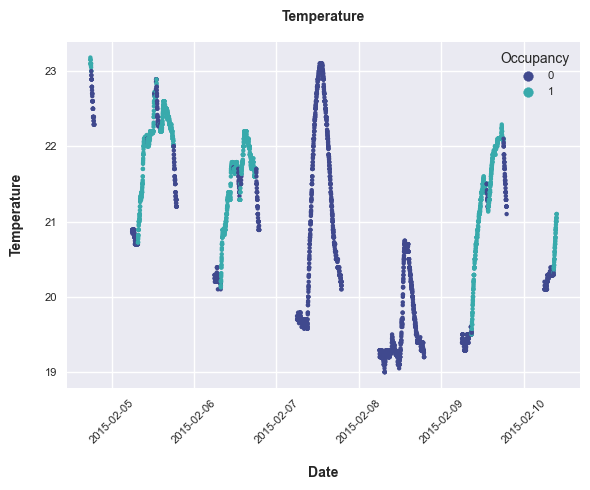

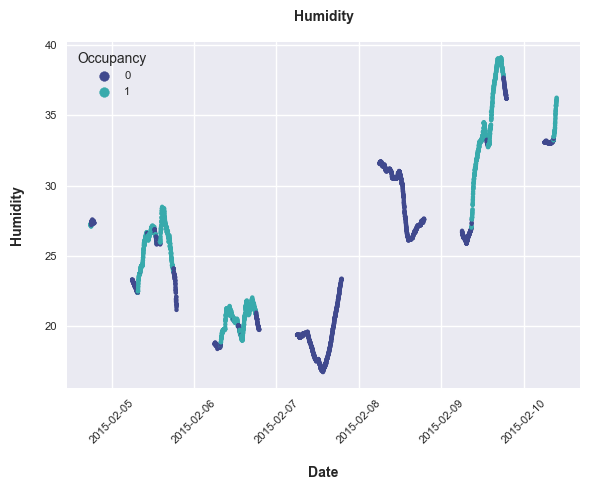

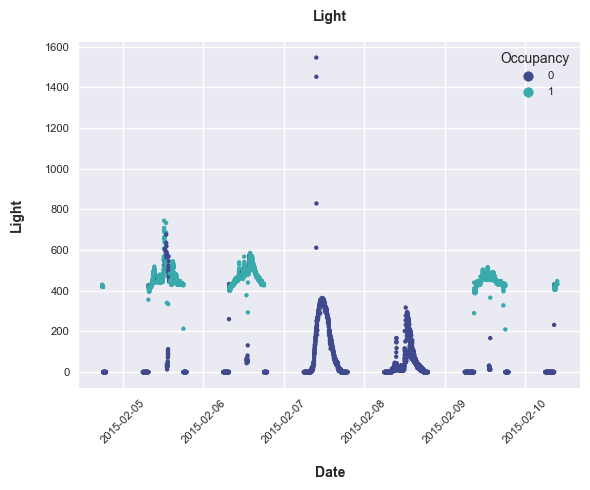

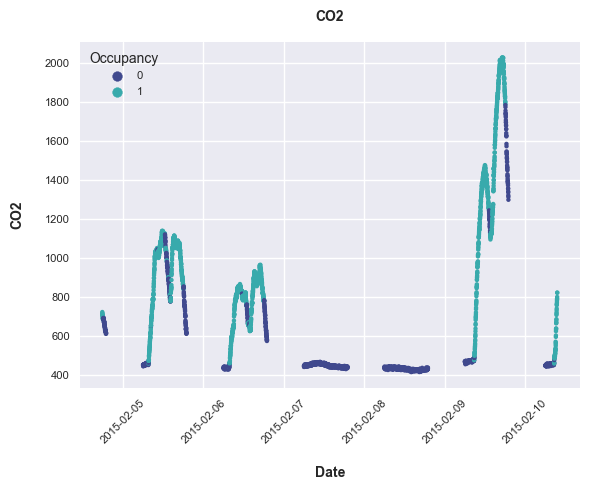

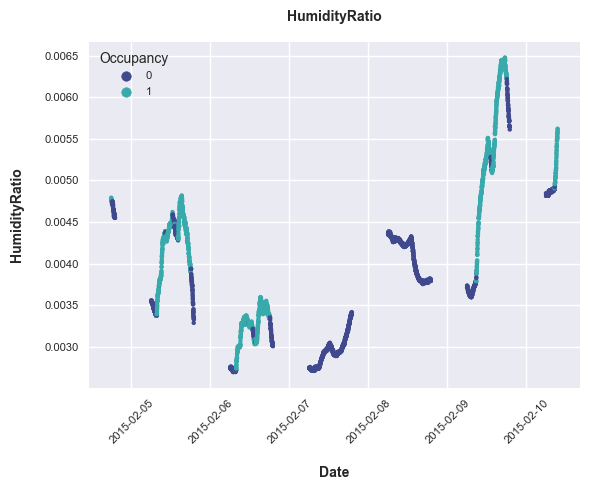

In [114]:
# replot data for daytime
for item in columns:
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.scatterplot(data=data[data['day'] == 'Day'], x='date', y=item, ax=ax, hue='Occupancy', palette='mako', s=10, linewidth=0)
    ax.set_title(item)
    ax.set_xlabel('Date')
    ax.set_ylabel(item)
    
    # rotate xticks
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        
    # display plot
    plt.tight_layout()
    plt.show()

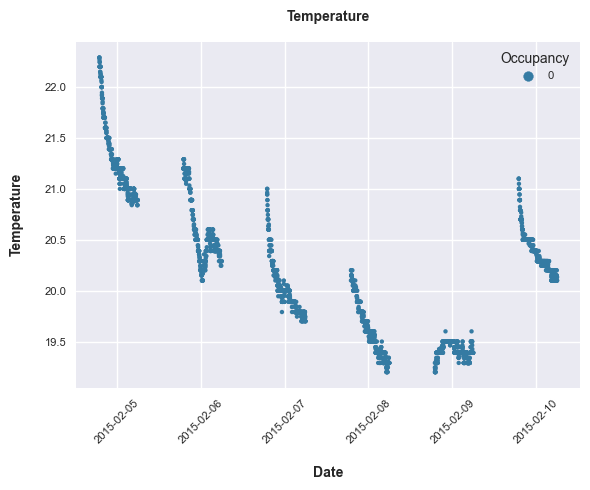

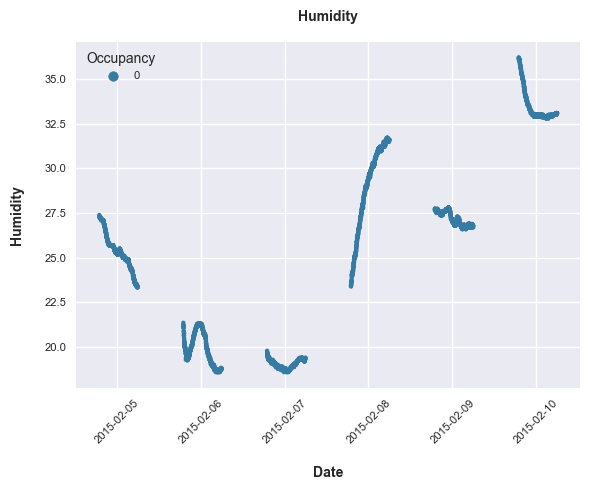

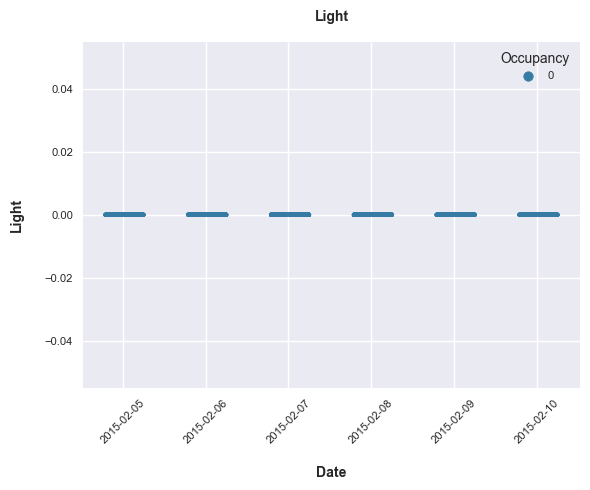

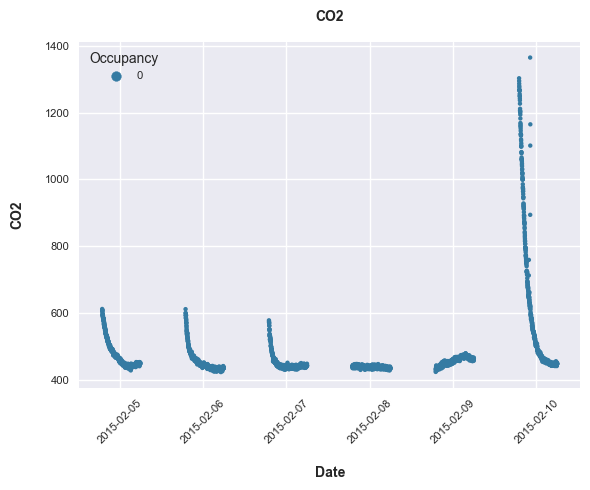

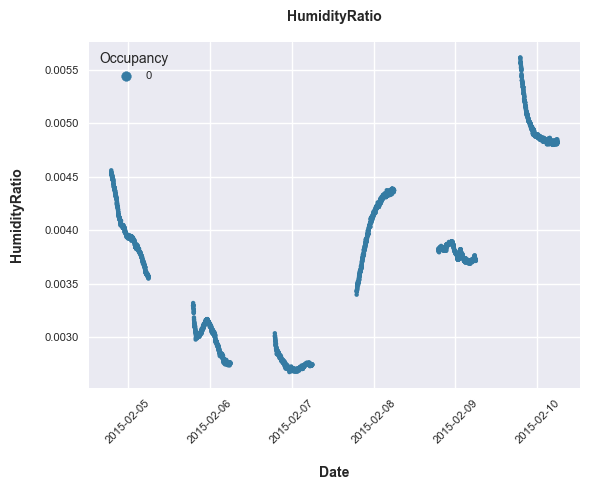

In [113]:
# replot data for daytime
for item in columns:
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.scatterplot(data=data[data['day'] == 'Night'], x='date', y=item, ax=ax, hue='Occupancy', palette='mako', s=10, linewidth=0)
    ax.set_title(item)
    ax.set_xlabel('Date')
    ax.set_ylabel(item)
    
    # rotate xticks
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        
    # display plot
    plt.tight_layout()
    plt.show()

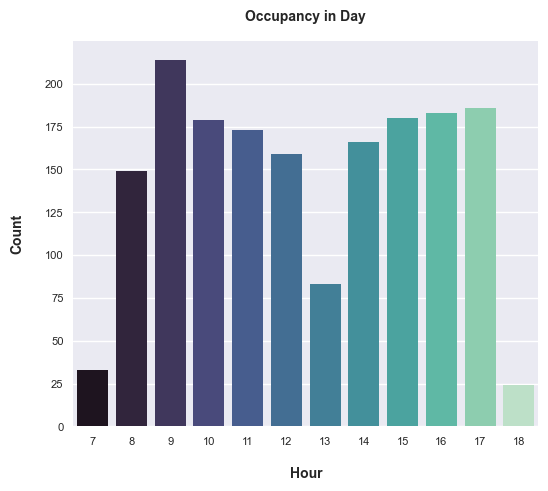

In [122]:
# total time spent in each hour
hour = data[data['Occupancy'] == 1]['date'].apply(lambda x: x.hour).value_counts().sort_index()

# create plot
fig, ax = plt.subplots(figsize=(6, 5))

# plot data
sns.barplot(x=hour.index, y=hour.values, ax=ax, palette='mako')
ax.set_title('Occupancy in Day')
ax.set_xlabel('Hour')
ax.set_ylabel('Count')

# display plot
plt.show()

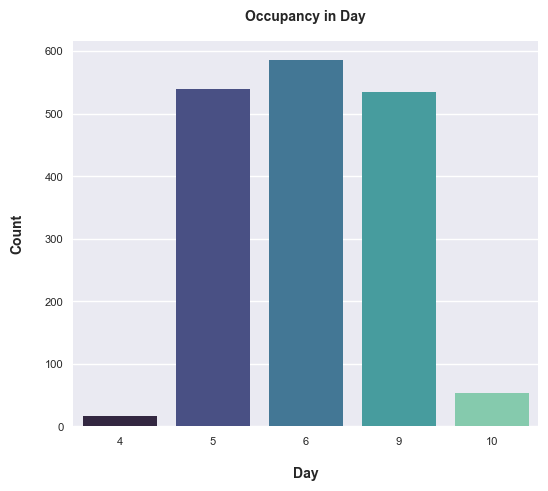

In [123]:
# total time spent in each day
day = data[data['Occupancy'] == 1]['date'].apply(lambda x: x.day).value_counts().sort_index()

# create plot
fig, ax = plt.subplots(figsize=(6, 5))

# plot data
sns.barplot(x=day.index, y=day.values, ax=ax, palette='mako')
ax.set_title('Occupancy in Day')
ax.set_xlabel('Day')
ax.set_ylabel('Count')

# display plot
plt.show()

### Insights from dataset

- Saat ruangan digunakan (Occupancy = 1), suhu ruangan (Temperature) cenderung lebih tinggi dibandingkan saat ruangan tidak digunakan (Occupancy = 0).
- Saat ruangan digunakan (Occupancy = 1), kelembaban ruangan (Relative Humidity) cenderung lebih rendah dibandingkan saat ruangan tidak digunakan (Occupancy = 0).
- Saat ruangan digunakan (Occupancy = 1), cahaya ruangan (Light) cenderung lebih tinggi dibandingkan saat ruangan tidak digunakan (Occupancy = 0).
- Saat ruangan digunakan (Occupancy = 1), kadar CO2 (CO2) cenderung lebih tinggi dibandingkan saat ruangan tidak digunakan (Occupancy = 0).
- Saat ruangan digunakan (Occupancy = 1), kadar kelembaban relatif (Humidity Ratio) cenderung lebih tinggi dibandingkan saat ruangan tidak digunakan (Occupancy = 0).
- Ruangan hanya digunakan saat daytime (08:00 - 18:00).
- cahanaya ruangan saat malam hari (18:00 - 08:00) selalu 0.
- Ruangan paling sering digunakan pada jam 09:00 - 10:00.
- Ruangan paling sering digunakan pada tanggal 5, 6 dan 9 Februari 2015.